In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kmer_profile_decomposer import KmerProfileModel

In [2]:
df = pd.read_table("tests/data/kmer_profile.tsv", names=("depth", "count"))

In [3]:
model = KmerProfileModel(df['depth'], df['count'], 12, 15, 2000)
result = model.fit(107, residuals='linear')

/workspace/kmer-profile-decomposer/src/kmer_profile_decomposer/decomposer.py:208: RuntimeWarning: divide by zero encountered in log
  predicted_log_counts = np.log(predicted_counts)


In [4]:
result

_KmerProfileModelFitResult(peaks=12, min_depth=15, max_depth=2000, parameters=_KmerProfileModelParameters(error_dispersion=0.1382788005437073, error_weight=2.6995121773112007, haploid_depth=106.94600328439472, peak_dispersion_bias=1.5398937789201663, peak_weights=[0.03043700336115711, 0.5103032636606998, 0.011705935663490544, 0.0930762456281533, 0.0053519511948737705, 0.02291754084487295, 0.0027827196523075763, 0.007214288137433299, 0.0016834548965449611, 0.0029645520113530843, 0.0009465103777133883, 0.0018531635049286808]))

(0.0, 1.0, 0.0, 1.0)

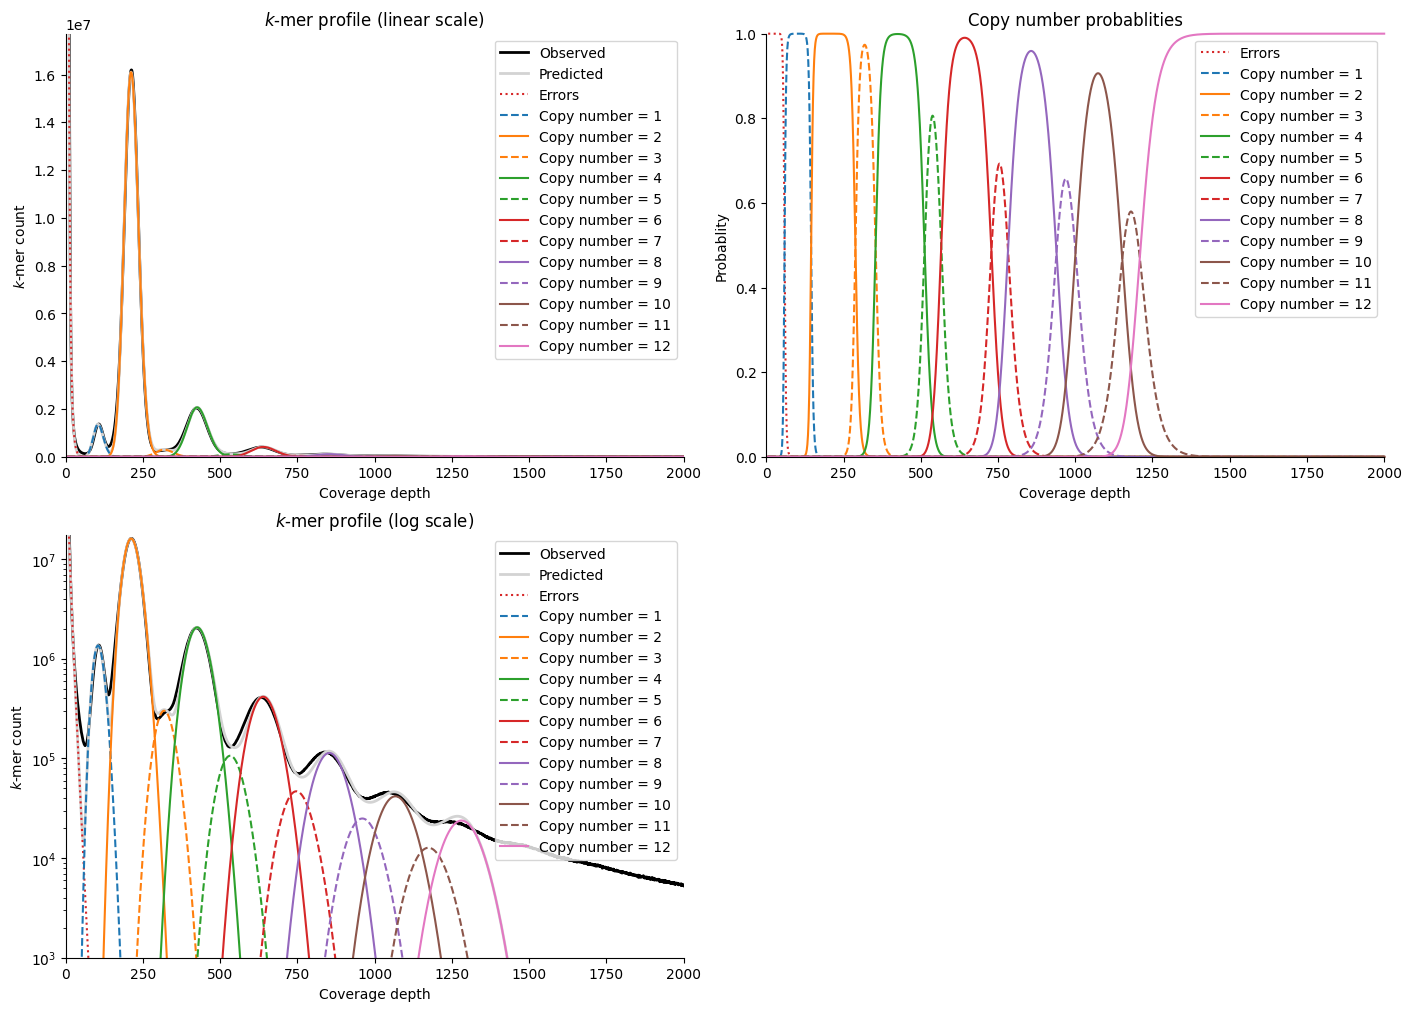

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, constrained_layout=True)
result.plot_model(axes[0, 0])
result.plot_model(axes[1, 0], scale='log')
result.plot_probablity(axes[0, 1])
axes[1, 1].axis('off')

In [6]:
model = KmerProfileModel(df['depth'], df['count'], 12, 15, 1400)
result = model.fit(107, residuals='log')
result

_KmerProfileModelFitResult(peaks=12, min_depth=15, max_depth=1400, parameters=_KmerProfileModelParameters(error_dispersion=0.06066223941501241, error_weight=1.3948464541979908, haploid_depth=106.7626966769535, peak_dispersion_bias=2.1578123786387473, peak_weights=[0.02975258298495382, 0.44917184350865486, 0.010062709375761278, 0.09149174957672326, 0.004201042722376916, 0.023860060163269838, 0.0023244409078502673, 0.007684191717581076, 0.001371787952220229, 0.0034029126874339007, 0.00047578840648188666, 0.002551499097258719]))

(0.0, 1.0, 0.0, 1.0)

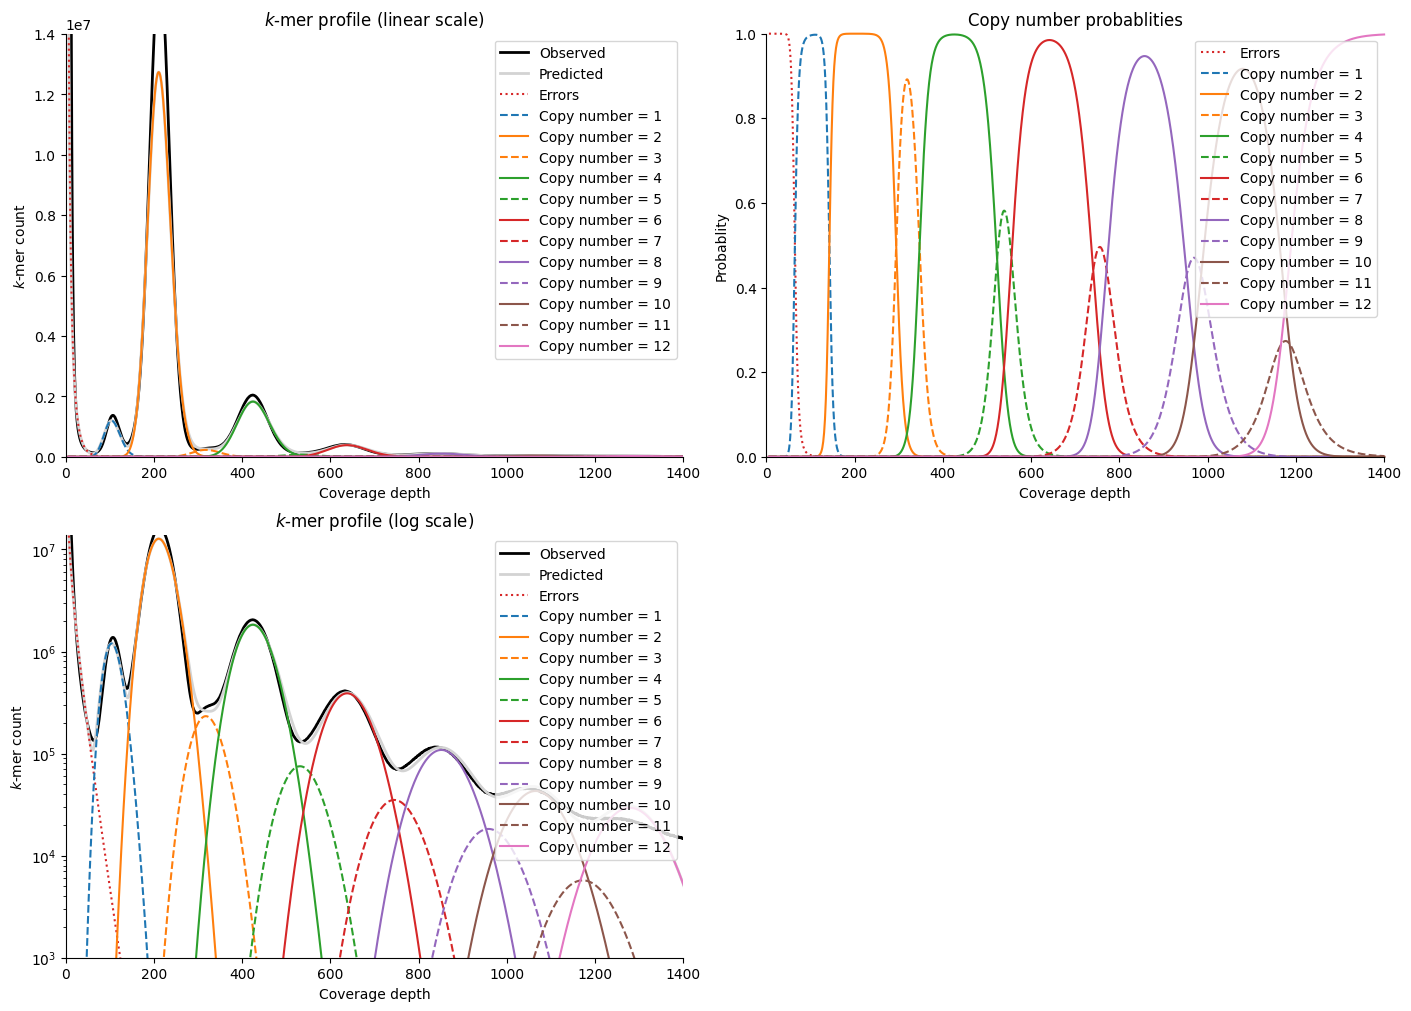

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, constrained_layout=True)
result.plot_model(axes[0, 0])
result.plot_model(axes[1, 0], scale='log')
result.plot_probablity(axes[0, 1])
axes[1, 1].axis('off')

In [8]:
log_prob_df = pd.DataFrame(
    dict(
        depth=result.depths,
        error=result.error_log_probablities,
        **{f"CN={x}": probablities for x, probablities in result.peak_log_probablities.items()},
    ), dtype=np.float128,
).set_index("depth").iloc[:2000, :]
log_prob_df

,error,CN=1,CN=2,CN=3,CN=4,CN=5,CN=6,CN=7,CN=8,CN=9,CN=10,CN=11,CN=12
depth,,,,,,,,,,,,,
6.0,0.000000e+00,-17.770320,-39.555924,-64.878643,-87.889363,-113.360682,-136.843890,-162.164941,-186.008316,-211.159804,-235.200426,-260.515975,-2.842691e+02
7.0,0.000000e+00,-16.948520,-38.457239,-63.612222,-86.502242,-111.879215,-135.284958,-160.540293,-184.326602,-209.427659,-233.423101,-258.697730,-2.824135e+02
8.0,0.000000e+00,-16.185288,-37.420760,-62.409323,-85.179322,-110.462362,-133.790920,-158.980740,-182.710134,-207.760878,-231.711235,-256.945023,-2.806235e+02
9.0,0.000000e+00,-15.471958,-36.437727,-61.261164,-83.911812,-109.101330,-132.352981,-157.477485,-181.150114,-206.150662,-230.056029,-255.249053,-2.788902e+02
10.0,-7.714620e-16,-14.801926,-35.501441,-60.161027,-82.692988,-107.789391,-130.964408,-156.023795,-179.639810,-204.590279,-228.450750,-253.603087,-2.772071e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001.0,-2.912886e+01,-232.465304,-183.865400,-148.893758,-118.146091,-94.654846,-72.933805,-56.119800,-40.406797,-28.214116,-16.839006,-8.441351,-1.571931e-09
2002.0,-2.910190e+01,-232.567541,-183.957282,-148.975526,-118.217976,-94.717067,-72.986572,-56.163316,-40.441253,-28.239699,-16.855892,-8.449712,-1.541955e-09
2003.0,-2.907488e+01,-232.669733,-184.049124,-149.057259,-118.289830,-94.779262,-73.039318,-56.206814,-40.475696,-28.265272,-16.872772,-8.458071,-1.512565e-09
